In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams.update({'font.size': 12})

pd.set_option('precision', 2)

In [2]:
df = pd.read_csv('health_spending_dataset.csv')
df.head()

,country,year,gdp,population,health_expenditure_per_capita,life_expectancy,gdp_per_capita,continent
0,Afghanistan,2016,1.94e+10,3.54e+07,61.45,63.76,547.23,Asia
1,Albania,2016,1.19e+10,2.88e+06,NaN,78.19,4124.06,Europe
2,Algeria,2016,1.60e+11,4.06e+07,260.42,76.30,3946.44,Africa
3,American Samoa,2016,6.52e+08,5.57e+04,NaN,NaN,11696.96,NaN
4,Andorra,2016,2.90e+09,7.73e+04,3843.70,NaN,37474.67,Europe


In [3]:
# Print a summary of the interesting numerical columns.
df[['gdp','population','health_expenditure_per_capita','life_expectancy','gdp_per_capita']].describe()

,gdp,population,health_expenditure_per_capita,life_expectancy,gdp_per_capita
count,2.03e+02,2.16e+02,184.00,201.00,203.00
mean,3.70e+11,3.42e+07,1041.60,72.32,16268.56
std,1.62e+12,1.35e+08,1712.21,7.75,24484.59
min,3.65e+07,1.12e+04,16.36,51.59,282.19
25%,5.61e+09,7.63e+05,85.77,67.17,2184.11
50%,2.42e+10,6.42e+06,318.69,73.84,5871.22
75%,1.82e+11,2.38e+07,1077.79,77.96,19183.62
max,1.87e+13,1.38e+09,9941.35,84.23,170028.66


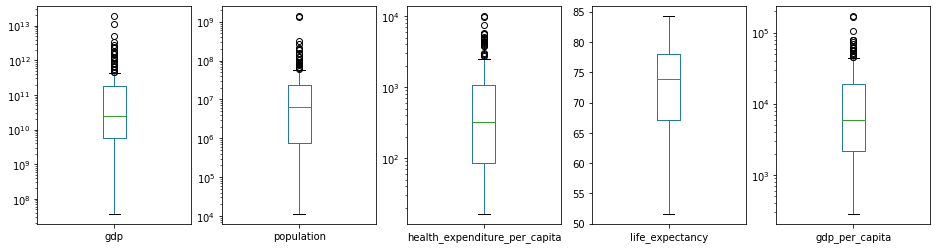

Note: all of them are on the log scale except life expectancy, this is because they were very
positively skewed (ie the large values are spread over a very broad range in comparison with the small values)


In [20]:
columns = ['gdp','population','health_expenditure_per_capita','life_expectancy','gdp_per_capita']

fig, axes = plt.subplots(1, len(columns), figsize=(len(columns)*16/5,4))

for ax, col in zip(axes, columns):
    df[col].plot.box(ax=ax)
    if col != 'life_expectancy':
        ax.set_yscale('log')
plt.show()
        
print('Note: all of them are on the log scale except life expectancy, this is because they were very\n'
      'positively skewed (ie the large values are spread over a very broad range in comparison with the small values)')

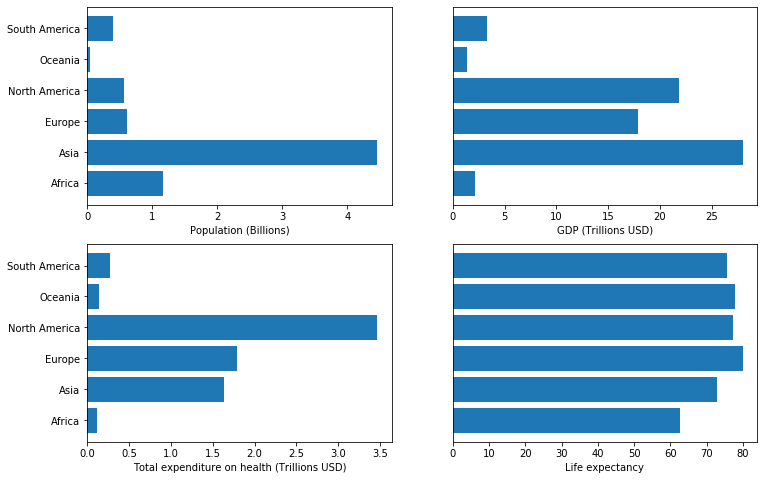

Note: This is the "average" life expectancy for the continent, where the life expectancy of each person
is that of the country they life in.


In [4]:
df['total_spending'] = df['health_expenditure_per_capita'] * df['population']
df_ = df.dropna()
grouped = df_.drop(columns=['country','year']).groupby('continent').aggregate(['count','sum'])

fig, axes = plt.subplots(2,2, figsize=(12,8))

ax = axes[0,0]
ax.barh(grouped.index, grouped[('population','sum')]/1e9)
ax.set_xlabel('Population (Billions)')
#plt.show()

ax = axes[0,1]
ax.barh(grouped.index, grouped[('gdp','sum')]/1e12)
ax.set_xlabel('GDP (Trillions USD)')
ax.set_yticks([])
#plt.show()

ax = axes[1,0]
ax.barh(grouped.index, grouped[('total_spending','sum')]/1e12)
ax.set_xlabel('Total expenditure on health (Trillions USD)')
#plt.show()

continent_life_expectancy = lambda x: np.average(x, weights=df.loc[x.index, 'population'] )
life_expectancies = df_.drop(columns=['country','year']).groupby('continent')\
                    ['life_expectancy'].aggregate(continent_life_expectancy)
ax = axes[1,1]
ax.barh(life_expectancies.index, life_expectancies)
ax.set_xlabel('Life expectancy (years)')
ax.set_yticks([])
plt.show()
print('Note: This is the "average" life expectancy for the continent, where the life expectancy of each person\n'
      'is that of the country they life in.')


This graphs show some very interesting relationships between wealth, health expenditure and life expectancy. Lets start with looking at wealth (quantified by the continents GDP). It is quite remarkable, although not surprising, that the GDP of Europe and North America is comparable to that of Asia, even though their populations are 4 or 5 times smaller. Nonetheless, Asia's GDP is still the largest. Then we have Africa, with a population larger than any other continent but Asia, yet a very small GDP, only comparable with South America and Oceania, both of which have a population several times smaller. This is all refelcted in the GDP per capita (see below): Africa's is minute in comparison with the rest, while Asia's is also minute in comparison with Europe's, North America's and Oceania's; despite having the largest overall GDP. We can clearly see there is three 'rich' continents and three 'poor' continents, where the large majority of people live in the 'poor' continents.

There is a stark contrast though, between the population and wealth of a continent, and the amount it spends on healthcare. In the graph above we can see that North America spends almost twice as much on healthcare as Europe -which has comparable population and wealth- or Asia -which has a much larger population and somewhat larger GDP-. In spite of this, the life expectancy at birth of north americans smaller than that of europeans. As a side note, this might be due to the difference in how healthcare is provided in each place. Whilst some form of public healthcare is widespread in countries in Europe, this is not so widespread in North America, with the US being the most notable case. Finally, we can see that Africa is an outlier with regards to life expectancy, with a life expectancy at birth of less than 65 years for its inhabitants. Asia's life expectancy is also rather low, however, this is in line with the relationship between the size of its population and its spending on health.


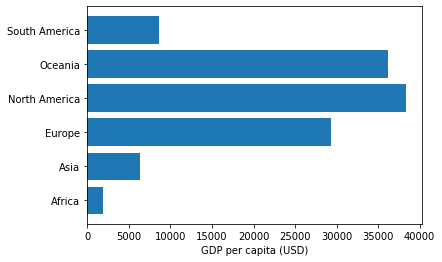

In [23]:
plt.barh(grouped.index, grouped[('gdp','sum')]/grouped[('population','sum')])
plt.xlabel('GDP per capita (USD)')
plt.show()

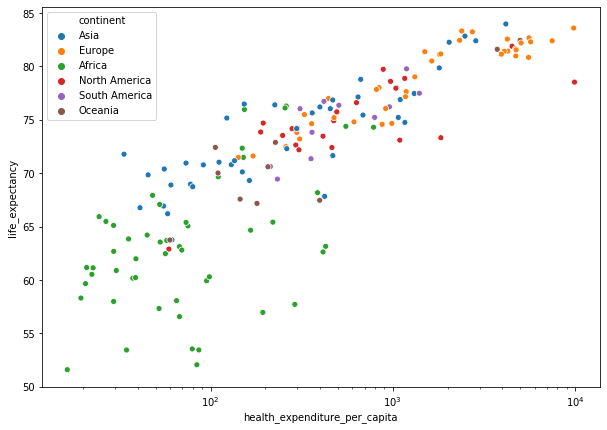

In [5]:
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(x='health_expenditure_per_capita', y='life_expectancy', hue='continent', data=df, ax=ax)
plt.xscale('log')
plt.show()

There is a very clear logarithmic relationship between health expenditure per capita and life expectancy, as shown in the graph above.

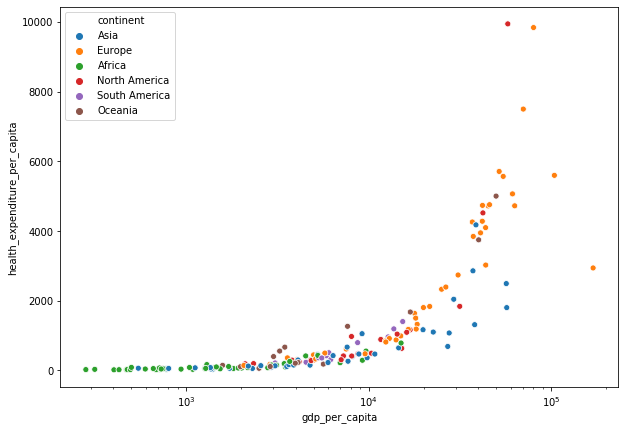

In [6]:
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(x='gdp_per_capita', y='health_expenditure_per_capita', hue='continent', data=df, ax=ax)
plt.xscale('log')
plt.show()

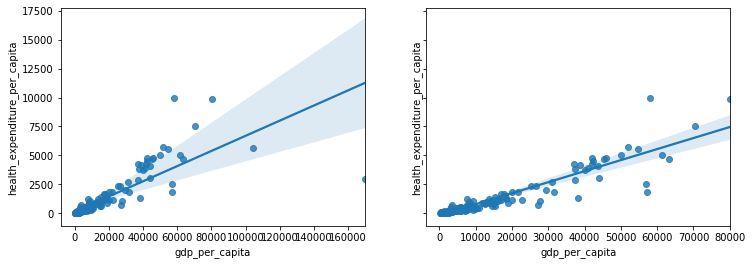

In [7]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(12,4))
sns.regplot(x='gdp_per_capita', y='health_expenditure_per_capita', data=df, ax=ax[0])

# Plot without some of the outliers (Monaco and Luxenbourg in this case).
df_ = df.loc[df['gdp_per_capita'] < 90000]
sns.regplot(x='gdp_per_capita', y='health_expenditure_per_capita', data=df_, ax=ax[1])
# plt.xscale('log')
plt.show()

We can see here that the relationship between GDP per capita and health expenditure per capita is linear. Furthermore by taking out of the dataset two outliers we see the uncertainty around this relationship greatly reduce.